# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0.1', axis=1)
diamonds = diamonds.drop('Unnamed: 0', axis=1)

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_index,color_index
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,6
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,6
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,6
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1,2


Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here
diamonds.groupby(by='color')['price'].describe().sort_values(by='color')

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
D,6775.0,3169.954096,3356.590935,357.0,911.0,1838.0,4213.50,18693.0
E,9797.0,3076.752475,3344.158685,326.0,882.0,1739.0,4003.00,18731.0
F,9542.0,3724.886397,3784.992007,342.0,982.0,2343.5,4868.25,18791.0
G,11292.0,3999.135671,4051.102846,354.0,931.0,2242.0,6048.00,18818.0
H,8304.0,4486.669196,4215.944171,337.0,984.0,3460.0,5980.25,18803.0
I,5422.0,5091.874954,4722.387604,334.0,1120.5,3730.0,7201.75,18823.0
J,2808.0,5323.818020,4438.187251,335.0,1860.5,4234.0,7695.00,18710.0


In [ ]:
#your comments here

"""The closer the color is to J, the higher the price. It makes sense as J is the best color."""

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [ ]:
#your hypotheses here

"""The cut, the clarity and the size, maybe."""

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [189]:
#your code here

diamonds.groupby('color').agg('mean')

,carat,depth,table,price,x,y,z,clarity_index,color_index
color,,,,,,,,,
D,0.657795,61.698125,57.404590,3169.954096,5.417851,5.421928,3.342827,2.691513,6.0
E,0.657867,61.662090,57.491201,3076.752475,5.411580,5.416949,3.337767,2.969889,5.0
F,0.736538,61.694582,57.433536,3724.886397,5.616727,5.620634,3.464848,3.133934,4.0
G,0.771190,61.757111,57.288629,3999.135671,5.678549,5.681198,3.507345,3.463425,3.0
H,0.911799,61.836850,57.517811,4486.669196,5.984776,5.981484,3.698256,2.933646,2.0
I,1.026927,61.846385,57.577278,5091.874954,6.222826,6.222730,3.846369,2.964035,1.0
J,1.162137,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251,2.776353,0.0


**What do you see? Pay special attention to the relationship between price and color.**

In [ ]:
#your thoughts here

"""
The closest the color is to J:
1. the bigger the size of diamonds.
2. the higher the carats

So it seems that there is a correlation between the size, the color and the carats.
We can guess there will also be a correlation with the cut, because we can expect an higher attention for the 
cutting with the expensive diamonds.
"""

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

Text(0.5, 1.0, "Frequency of each diamond's color")

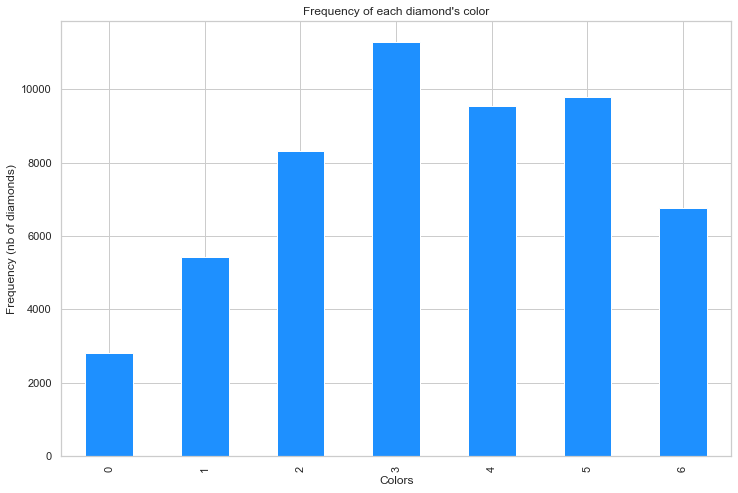

In [291]:
#your code here

%matplotlib inline
sns.set()

sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
diamonds.groupby('color_index').size().plot.bar(color='dodgerblue')
plt.xlabel('Colors')
plt.ylabel('Frequency (nb of diamonds)')
plt.title('Frequency of each diamond\'s color')

In [212]:
#your comments here

"""
The most wanted color is also the rarest.
"""

'\nThe most wanted color is also the rarest.\n'

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [192]:
#your code here

diamonds.groupby('carat').agg('mean')

,depth,table,price,x,y,z,clarity_index,color_index
carat,,,,,,,,
0.20,61.100000,59.333333,365.166667,3.786667,3.753333,2.303333,2.833333,5.166667
0.21,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222,2.666667,5.444444
0.22,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000,2.600000,4.800000
0.23,61.426621,58.034130,486.143345,3.946382,3.973379,2.431468,4.901024,4.518771
0.24,61.599213,57.488189,505.185039,3.990157,4.019331,2.465591,4.972441,4.185039
...,...,...,...,...,...,...,...,...
4.00,63.300000,58.000000,15984.000000,10.010000,9.940000,6.310000,0.000000,1.000000
4.01,61.750000,61.500000,15223.000000,10.080000,10.020000,6.205000,0.000000,0.500000
4.13,64.800000,61.000000,17329.000000,10.000000,9.850000,6.430000,0.000000,2.000000


In [ ]:
#your comments

"""
The higher the carat, the heigher the price.
"""


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

Text(0, 0.5, 'Frequency (nb of diamonds)')

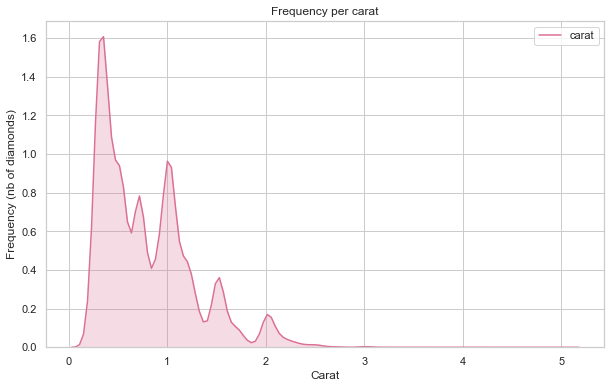

In [264]:
#your code here

plt.figure(figsize=(10,6))

#diamonds['carat'].value_counts().plot.hist(color='pink')
#plt.title('Carat frequencies')

sns.set_style('whitegrid')
sns.kdeplot(diamonds['carat'], color='palevioletred',shade=True)
plt.title('Frequency per carat')
plt.xlabel('Carat')
plt.ylabel('Frequency (nb of diamonds)')

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [265]:
#your code here

diamonds.groupby('table').agg('mean')

,carat,depth,price,x,y,z,clarity_index,color_index
table,,,,,,,,
43.0,1.0400,62.90,4997.0,6.450,6.410,4.040,4.00,1.0
44.0,0.2900,62.80,474.0,4.200,4.240,2.650,4.00,5.0
49.0,0.6500,64.25,2290.5,5.355,5.320,3.425,3.00,3.0
50.0,1.5100,61.50,8995.5,7.380,7.295,4.510,2.00,3.0
50.1,0.9400,66.00,3353.0,6.130,6.170,4.060,1.00,2.0
...,...,...,...,...,...,...,...,...
71.0,0.6800,58.00,1633.0,5.850,5.700,3.350,2.00,3.0
73.0,0.6025,68.90,2406.5,5.520,5.465,3.745,3.25,4.5
76.0,0.7900,65.30,2362.0,5.520,5.130,3.350,2.00,3.0


In [ ]:
#your comments here

"""
Does not seems to be link with price.
"""

**Finally, do the same with the `clarity` column.**

In [124]:
#your code here

diamonds.groupby('clarity_index').agg('mean')

,carat,depth,table,price,x,y,z,color_index
clarity_index,,,,,,,,
0,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.224688,2.968961
1,1.077648,61.772167,57.927181,5063.028606,6.404157,6.395603,3.950922,3.469980
2,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.640636,3.448450
3,0.763935,61.724417,57.417401,3924.989395,5.658633,5.659782,3.492218,3.494208
4,0.727158,61.667458,57.315151,3839.455391,5.572860,5.580017,3.437504,3.161792
5,0.596202,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465,3.569483
6,0.503321,61.624651,56.884460,2523.114637,4.961721,4.976437,3.061294,3.351573
7,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659,3.101676


In [ ]:
#your comments here

"""
Does not seems to be correlated with prices.
"""

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [ ]:
#your thoughts here


"""
Finally, it appears that the size and the color are the most important variables that affect diamonds price.
It seems to be the rarity that brings value to diamonds because the biggest sizes and the most wanted color
are also the rarest.
"""

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


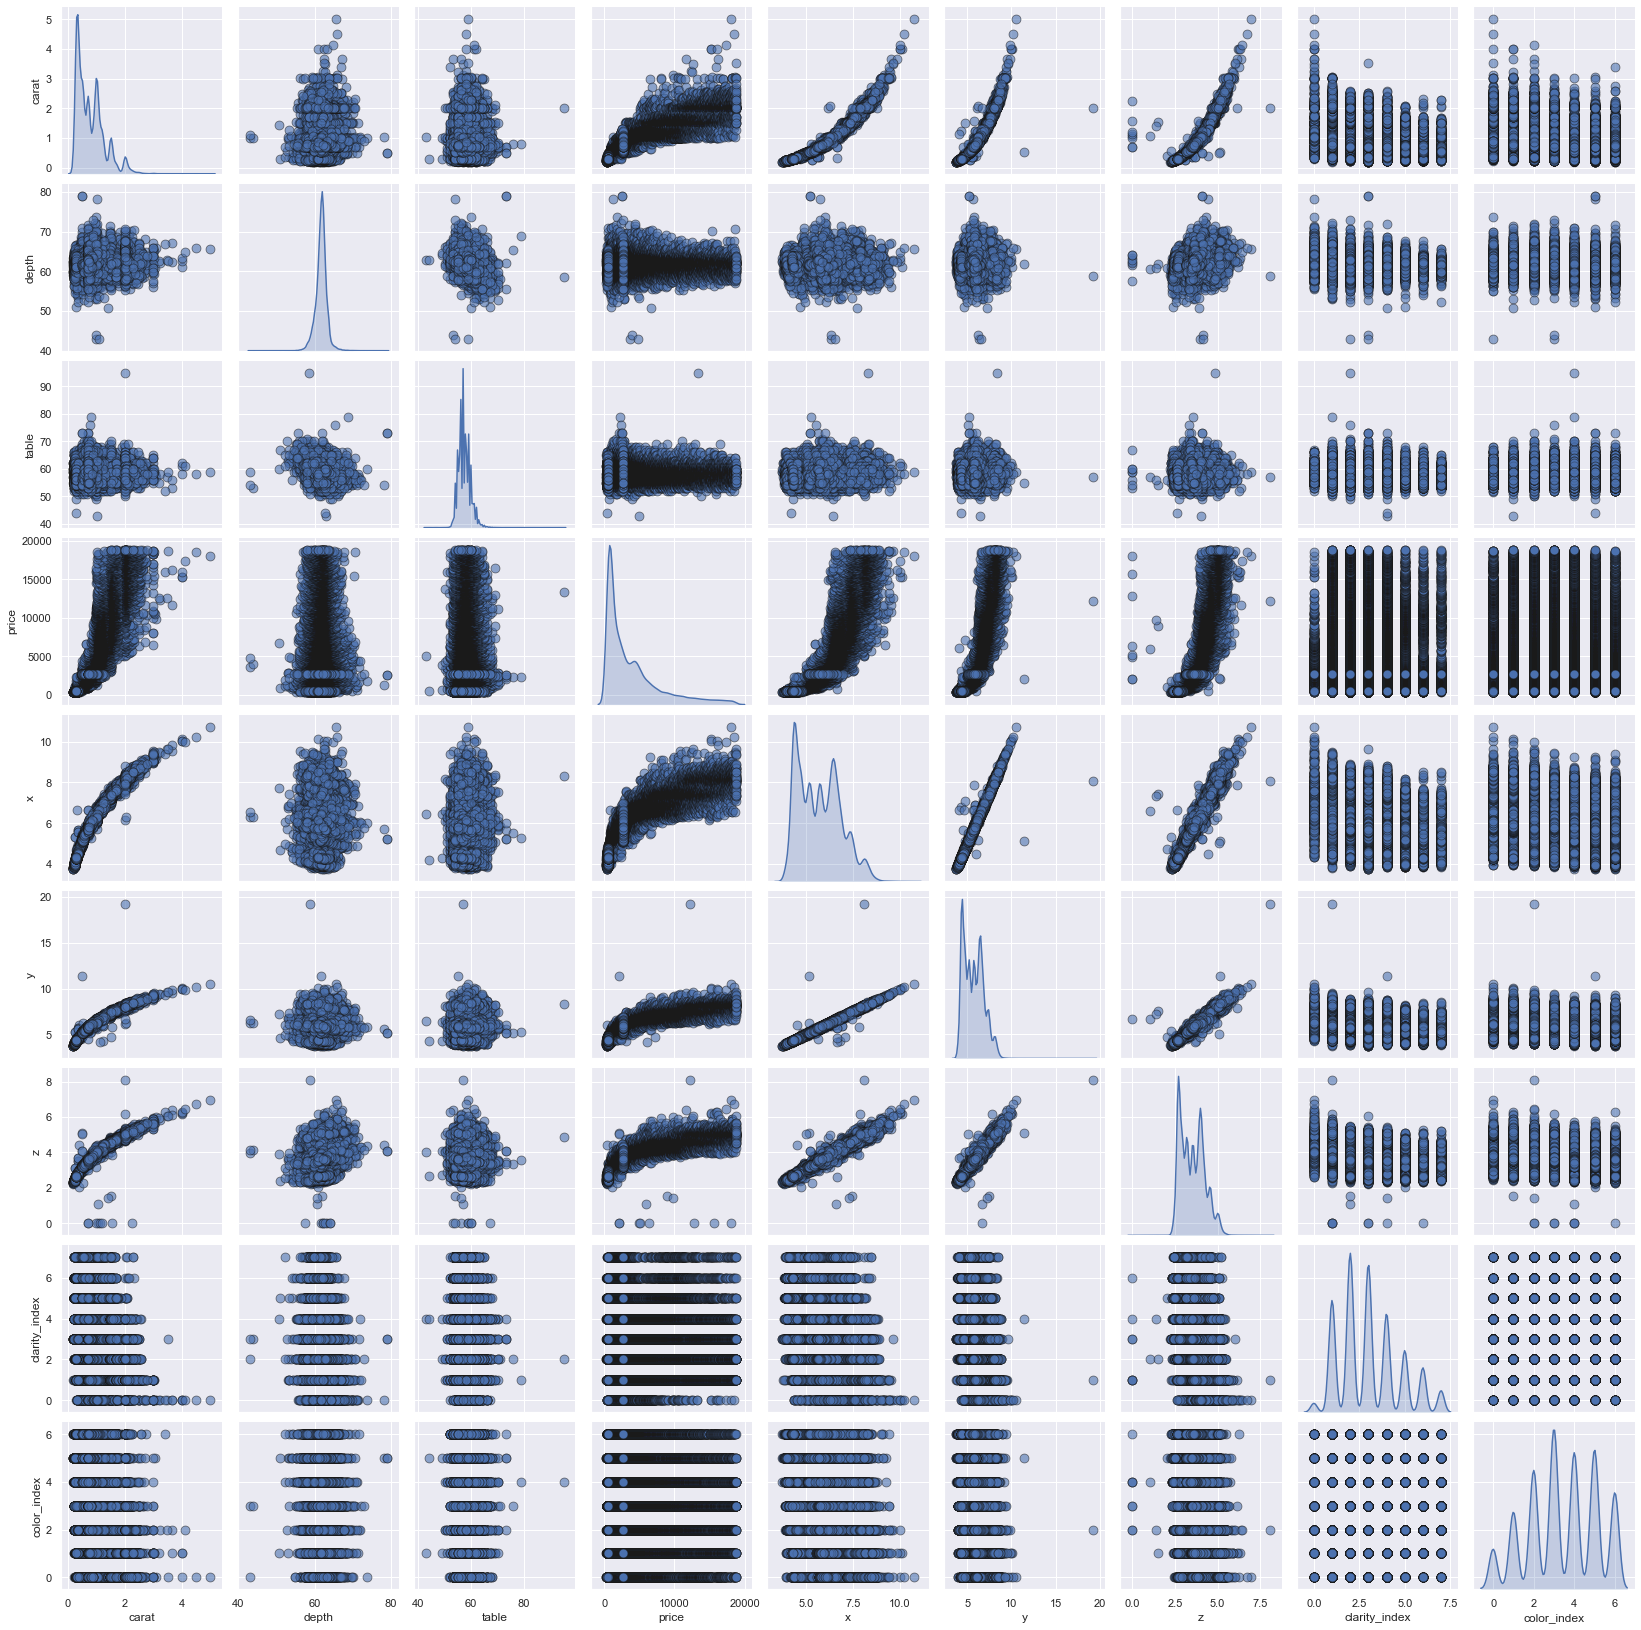

In [125]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here

"""
The most interesting relationships seem to be the one between size (x,y,z) and price. The positive correlation 
is very visible.
"""

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

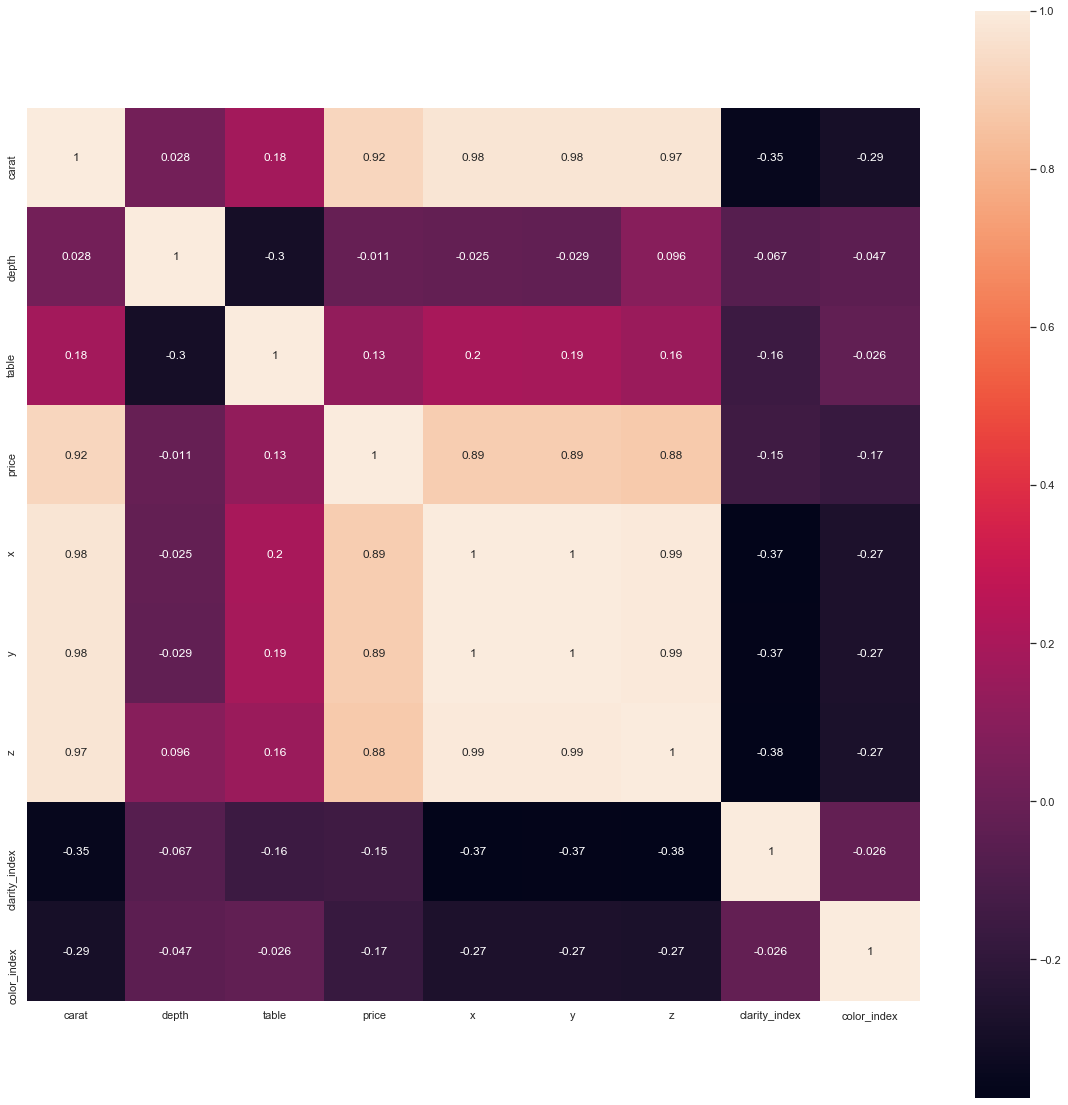

In [126]:
#Run this code
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
#your thoughts here

"""
The brightest part of the table shows the hightest positive correlation.
So, the positive correlation between size & weight and price seems to be confirmed.
On the other hand, it seems to be no correlation between color and price.
"""

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

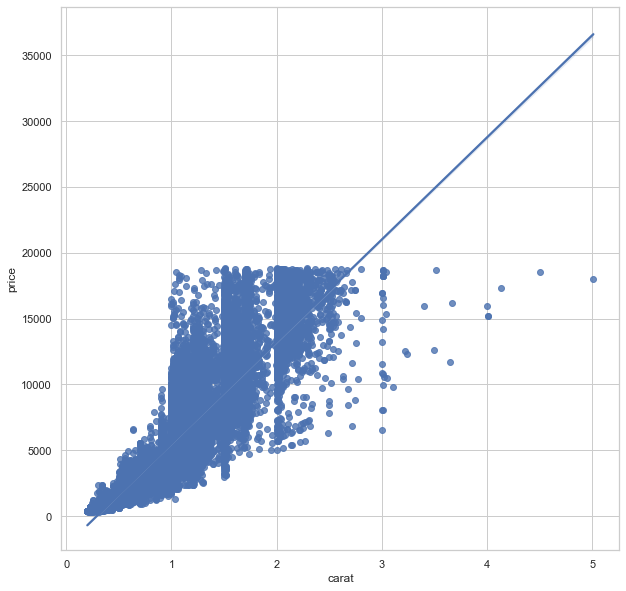

In [297]:
#Run this code

plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [128]:
#Run this code

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8493305264354846

**What do you think?**

In [ ]:
#your thoughts here

"""
R2 is pretty high, we can conclude that the higher the weight, the higher the price expended is.
"""

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

"""
Carat is also strongly correlated with price, but it is also depending on the size of the diamonds.
"""

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.